Importing modules

In [48]:
import numpy
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

Functions for distance and knn itself

In [46]:
def euclidian_distance(p1, p2):
    return numpy.sqrt(numpy.sum((numpy.array(p1) - numpy.array(p2))**2))

def manhattan_distance(p1, p2):
    return numpy.sum(numpy.abs(numpy.array(p1) - numpy.array(p2)))

def minkowski_distance(p1, p2, p):
    return numpy.sum((numpy.array(p1) - numpy.array(p2))**p)**(1/p)



def knn_classification(trainX, trainY, testX, k, p):
    testY = []
    for i in range(len(testX)):
        distances = []
        for j in range(len(trainX)):
            dist = minkowski_distance(testX[i], trainX[j], p)
            distances.append((dist, trainY[j]))
        distances.sort(key=lambda x: x[0])
        k_nearest_classes = [label for _, label in distances[:k]]
        most_common_class = Counter(k_nearest_classes).most_common(1)[0][0]
        testY.append(most_common_class)
    
    return testY

Iris Dataset - Data loading, separation and normalization

In [54]:
# ===== CONFIGURE HERE =====
csv_path = "../../Datasets/Iris.csv"
test_size = 0.3  
random_state = 42  

# ===== LOAD DATASET =====
df = pd.read_csv(csv_path)
print(f"✅ Loaded dataset: {csv_path}")
print(f"   Rows: {len(df)}, Columns: {len(df.columns)}")
df = df.iloc[:, 1:]  # keep only real features + label

# ===== SPLIT DATASET =====
train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)

print(f"📊 Training set: {len(train_df)} rows")
print(f"📊 Test set: {len(test_df)} rows")

print("\nTraining set sample:")
print(train_df.head())
print("\nTest set sample:")
print(test_df.head())

# Separate features and labels
X_train = train_df.iloc[:, :-1].values  
Y_train = train_df.iloc[:, -1].values   
X_test = test_df.iloc[:, :-1].values
Y_test = test_df.iloc[:, -1].values

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train:")
print(X_train)

print("\nY_train:")
print(Y_train)

print("\nX_test:")
print(X_test)

print("\nY_test:")
print(Y_test)

# ===== SCALLING TO GET MEAN = 0 AND STANDARD DEVIATION = 1 =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train:")
print(X_train)

print("\nY_train:")
print(Y_train)

print("\nX_test:")
print(X_test)

print("\nY_test:")
print(Y_test)

✅ Loaded dataset: ../../Datasets/Iris.csv
   Rows: 150, Columns: 6
📊 Training set: 105 rows
📊 Test set: 45 rows

Training set sample:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
81             5.5           2.4            3.7           1.0  Iris-versicolor
133            6.3           2.8            5.1           1.5   Iris-virginica
137            6.4           3.1            5.5           1.8   Iris-virginica
75             6.6           3.0            4.4           1.4  Iris-versicolor
109            7.2           3.6            6.1           2.5   Iris-virginica

Test set sample:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
73             6.1           2.8            4.7           1.2  Iris-versicolor
18             5.7           3.8            1.7           0.3      Iris-setosa
118            7.7           2.6            6.9           2.3   Iris-virginica
78             6.0           2.9            4.5           

Iris Dataset - Testing 

k=1, accuracy=0.9778
k=2, accuracy=0.9778
k=3, accuracy=1.0000
k=4, accuracy=1.0000
k=5, accuracy=1.0000
k=6, accuracy=1.0000
k=7, accuracy=1.0000
k=8, accuracy=1.0000
k=9, accuracy=1.0000
✅ Best k: 3 with accuracy: 1.0000


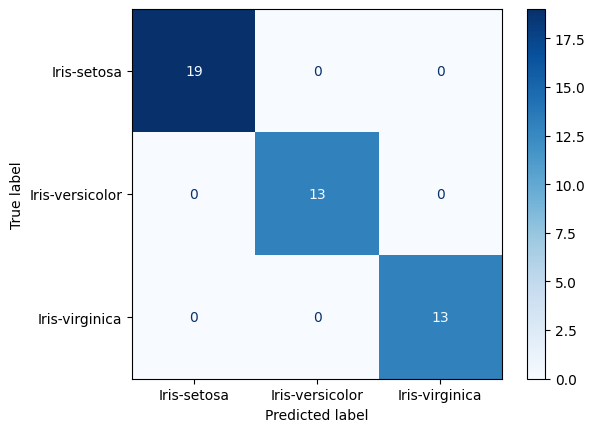

In [55]:
melhor_k = 0
melhor_acuracia = 0

for k in range(1, 10):
    pred = knn_classification(X_train, Y_train, X_test, k, 2)
    acc = accuracy_score(Y_test, pred)
    print(f"k={k}, accuracy={acc:.4f}")

    if acc > melhor_acuracia:
        melhor_acuracia = acc
        melhor_k = k
        melhor_pred = pred

print(f"✅ Best k: {melhor_k} with accuracy: {melhor_acuracia:.4f}")
cm = confusion_matrix(Y_test, melhor_pred, labels=df['Species'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Species'].unique())
disp.plot(cmap="Blues")

Diabetes Dataset - Data loading, separation and normalization

In [57]:
# ===== CONFIGURE HERE =====
csv_path = "../../Datasets/diabetes.csv"
test_size = 0.3  
random_state = 42  

# ===== LOAD DATASET =====
df = pd.read_csv(csv_path)
print(f"✅ Loaded dataset: {csv_path}")
print(f"   Rows: {len(df)}, Columns: {len(df.columns)}")
df = df.iloc[:, 1:]  # keep only real features + label

# ===== SPLIT DATASET =====
train_df_diabetes, test_df_diabetes = train_test_split(df, test_size=test_size, random_state=random_state)

print(f"📊 Training set: {len(train_df_diabetes)} rows")
print(f"📊 Test set: {len(test_df_diabetes)} rows")

# ===== OPTIONAL: inspect first few rows =====
print("\nTraining set sample:")
print(train_df_diabetes.head())
print("\nTest set sample:")
print(test_df_diabetes.head())

# Separate features and labels
X_train_diabetes = train_df_diabetes.iloc[:, :-1].values  
Y_train_diabetes = train_df_diabetes.iloc[:, -1].values  
X_test_diabetes = test_df_diabetes.iloc[:, :-1].values
Y_test_diabetes = test_df_diabetes.iloc[:, -1].values

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train_diabetes:")
print(X_train_diabetes)

print("\nY_train_diabetes:")
print(Y_train_diabetes)

print("\nX_test_diabetes:")
print(X_test_diabetes)

print("\nY_test_diabetes:")
print(Y_test_diabetes)

# ===== SCALLING TO GET MEAN = 0 AND STANDARD DEVIATION = 1 =====
scaler = StandardScaler()
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

# ===== PRINT FEATURES AND LABELS =====
print("\nX_train_diabetes:")
print(X_train_diabetes)

print("\nY_train_diabetes:")
print(Y_train_diabetes)

print("\nX_test_diabetes:")
print(X_test_diabetes)

print("\nY_test_diabetes:")
print(Y_test_diabetes)

✅ Loaded dataset: ../../Datasets/diabetes.csv
   Rows: 768, Columns: 9
📊 Training set: 537 rows
📊 Test set: 231 rows

Training set sample:
     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
334       95             60             18       58  23.9   
139      105             72             29      325  36.9   
485      135             68             42      250  42.3   
547      131             68             21      166  33.1   
18       103             30             38       83  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
334                     0.260   22        0  
139                     0.159   28        0  
485                     0.365   24        1  
547                     0.160   28        0  
18                      0.183   33        0  

Test set sample:
     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668       98             58             33      190  34.0   
324      112             75             32        0  35.7   
624      108     

Diabetes Dataset - Testing

k=1, accuracy=0.6537
k=2, accuracy=0.6537
k=3, accuracy=0.6970
k=4, accuracy=0.7056
k=5, accuracy=0.6926
k=6, accuracy=0.6926
k=7, accuracy=0.7273
k=8, accuracy=0.7143
k=9, accuracy=0.7229
k=10, accuracy=0.7229
k=11, accuracy=0.7576
k=12, accuracy=0.7532
k=13, accuracy=0.7403
k=14, accuracy=0.7359
k=15, accuracy=0.7446
k=16, accuracy=0.7532
k=17, accuracy=0.7359
k=18, accuracy=0.7446
k=19, accuracy=0.7316
k=20, accuracy=0.7316
k=21, accuracy=0.7273
k=22, accuracy=0.7229
k=23, accuracy=0.7316
k=24, accuracy=0.7316
k=25, accuracy=0.7403
k=26, accuracy=0.7446
k=27, accuracy=0.7619
k=28, accuracy=0.7532
k=29, accuracy=0.7489
✅ Best k: 27 with accuracy: 0.7619


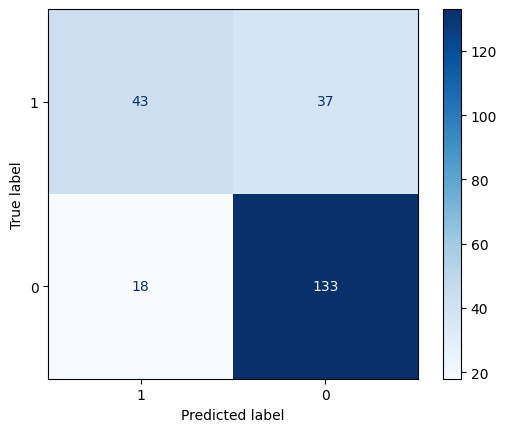

In [58]:
melhor_k = 0
melhor_acuracia = 0

for k in range(1, 30):
    pred = knn_classification(X_train_diabetes, Y_train_diabetes, X_test_diabetes, k, 2)
    acc = accuracy_score(Y_test_diabetes, pred)
    print(f"k={k}, accuracy={acc:.4f}")

    if acc > melhor_acuracia:
        melhor_acuracia = acc
        melhor_k = k
        melhor_pred = pred

print(f"✅ Best k: {melhor_k} with accuracy: {melhor_acuracia:.4f}")
cm = confusion_matrix(Y_test_diabetes, melhor_pred, labels=df['Outcome'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Outcome'].unique())
disp.plot(cmap="Blues")